# COGS 118A - Final Project

# Used Car Price Prediction

## Group members

- James Callahan
- Dima Musa
- Victor Tran
- Xiaonan Fu

# Abstract

The goal of our project is to predict the price of a used car (under $15,000) based on the following variables: number of days on the market, presence of frame damage, engine displacement, prior accidents, horsepower, major options, mileage, number of previous owners, and model year. We will be using multiple training algorithms (logistic regression, random forest, and SVM) to predict the price based on the multiple variables listed. Before committing to a model, we will perform simple statistical analysis to understand which variables impact price the most and how to weight them. Hyperparameters will be tuned with gridsearch, and performance will be measured by sklearn's score function. We found that random forest was the best method for classifying our data.

# Background

Cars are an essential part of everyday life for most Americans. In 2022, around 276 million vehicles were registered in the United States <a name="bts"></a>[<sup>[1]</sup>](#btsnote). In 2019, 40 thousand used light vehicles were purchased in comparison to the 1,500 new light vehicles purchased <a name="usedbts"></a>[<sup>[2]</sup>](#usedbtsnote). There is a clear demand for used cars in the United States. With such high demand, predicting the selling price of a used vehicle would be extremely useful to both sellers and buyers.

There have been multiple attempts to predict car prices using machine learning algorthims. In 2014, Sameerchand Pudaruth attempted to predict the price of used cars using multiple linear regression analysis, k-nearest neighbors, naive bayes and decision trees. Pudaruth based their prediction on make, model, volume of cylinder, mileage in kilometers, year of manufacture, and price. They found comparable predicitions from all machine learning models <a name="pudaruth"></a>[<sup>[3]</sup>](#pudaruthnote).

In 2019, Enis Gegic et al. also attempted to predict the price of used cars. They used artifical neural networks, support vector machine, and random forest. They also used cross validation to evaluate their predicitons. The variables used to make predictions were make, model, fuel type, power in kilowats, year of manufacture, miles, leather (yes/no), cruise control (yes/no), and price. Then, prices were classified based on price ranges. They found applying a single machine learning algorthim to be insufficent as "accuracy was less than 50%" (Gegic et al., 118). Thus, and "ensemble of multiple machine learning algorithms has been proposed and this combination of ML methods gains accuracy of 92.38%" (Gegic et al., 118) <a name="enis"></a>[<sup>[4]</sup>](#enisnote).

# Problem Statement

We want to build a model that would be able to accurately predict the sale price of a used car, taking in to account variables  such as make, model, mileage, accidents, and number of prior owners among others. 

Compounding global supply chain disruptions and materials shortages have sent used car prices skyrocketing in recent years. Shortages and inflated prices of new cars are driving up demand in the used market, leaving many Americans in a situation where they'll end up paying more than they should. We want to build a model that would be able to accurately predict the sale price of a used car, taking in to account variables such as number of prior owners, accidents, and mileage, among others. A car is a large investment, for many it's the second greatest expense after housing. Our hope is that this tool will help consumers better understand what factors have the strongest impact on the final sale price of a car, and to make clear what to look for to save money on a vehicle.

# Data

#### [US Used Cars Dataset](https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset?select=used_cars_data.csv)

This data set originally has:
- A whopping 66 variables
- 3,000,000 unique values

The 18 variables we have kept for now are: 
- body_type: Type String. Body Type of the vehicle. Like Convertible, Hatchback, Sedan, etc.
- latitude: Type Float. Latitude from the geolocation of the dealership.
- longitude: Type Float. Longitude from the geolocation of the dealership.
- daysonmarket: Type Integer. Days since the vehicle was first listed on the website.
- engine_displacement: Type Float. The measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers.
- frame_damage: Type Boolean. Whether the vehicle has a damaged frame.
- fuel_type: Type String. Dominant type of fuel ingested by the vehicle.
- has_accidents: Type Boolean. Whether the vin has any accidents registered.
- horsepower: Type Float. Horsepower is the power produced by an engine.
- lisitng_color:  Type String. Dominant color group from the exterior color.
- major_options: list of strings of features.
- make_name: Type string. Manufacturer of car.
- mileage: Type float. Number of miles driven by car.
- model_name: Type string. 
- owner_count: Type float. Number of owners.
- price: Type float. Listed price of car.
- transmission: Type string. Type of transmission.
- wheel_system: Type string. Type of wheel_system.
- year: Type int. Year of manufacture.

After deliberation of what is most valuable to train our model and computing power concerns, we decided to only keep the following variables:
- daysonmarket
- engine_displacement
- make_name
- frame_damaged
- has_accidents
- horsepower
- major_options
- mileage
- owner_count
- price
- year

We have one-hot encoded:
- make_name
- major_options

We have categorized:
- price

## Data Wrangling

Original dataset with 18 selected variables before wrangling.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.concat([pd.read_csv("./datasets/d1.csv"), 
pd.read_csv("./datasets/d2.csv"), 
pd.read_csv("./datasets/d3.csv"), 
pd.read_csv("./datasets/d4.csv")])
print(df.shape)
df.head()

(1330246, 19)


,body_type,latitude,longitude,daysonmarket,engine_displacement,frame_damaged,fuel_type,has_accidents,horsepower,listing_color,major_options,make_name,mileage,model_name,owner_count,price,transmission,wheel_system,year
0,Coupe,18.3467,-66.1098,1252,1700.0,False,Gasoline,False,237.0,RED,['Leather Seats'],Alfa Romeo,301.0,4C,2.0,97579.0,A,RWD,2015
1,Sedan,18.3467,-66.1098,1233,3000.0,False,Gasoline,False,320.0,SILVER,"['Sunroof/Moonroof', 'Alloy Wheels', 'Bluetooth']",BMW,6903.0,3 Series,2.0,58995.0,A,AWD,2016
2,Sedan,40.7333,-73.2587,33,1600.0,False,Gasoline,False,201.0,BLACK,"['Sport Package', 'Sunroof/Moonroof', 'Adaptiv...",Hyundai,30707.0,Elantra,1.0,13324.0,A,FWD,2017
3,Sedan,40.7333,-73.2587,55,1500.0,False,Gasoline,False,160.0,SILVER,"['Driver Confidence Package', 'Power Package',...",Chevrolet,42394.0,Malibu,1.0,14639.0,A,FWD,2018
4,Coupe,40.8847,-73.8317,36,3500.0,False,Gasoline,False,311.0,BLACK,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Lexus,62251.0,RC 350,1.0,32000.0,A,AWD,2018


Wrangling to keep 11 final variables.

In [25]:
#Create dataframe with variables we need
df_WIP = df.loc[:,['daysonmarket', 'engine_displacement', 'make_name', 
              'frame_damaged', 'has_accidents', 'horsepower',
              'major_options', 'mileage', 'owner_count', 'price', 'year']]
df_WIP = df_WIP.reset_index()
df_WIP = df_WIP.drop(['index'], axis = 1)

### One-Hot Encoding

In [26]:
#Turn major_options into one-hot encoded major options
mo = df_WIP['major_options']
mo = mo.str.replace("[","")
mo = mo.str.replace("]","")
mo = mo.str.replace("'","")
mo = mo.str.get_dummies(',')
df_WIP = pd.concat([df_WIP, mo], axis="columns")
df_WIP = df_WIP.drop(columns=['major_options'])
del mo

c:\ProgramData\Anaconda3\envs\massivepotree\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\ProgramData\Anaconda3\envs\massivepotree\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [27]:
#Turn make into one-hot encoded make
make = df_WIP['make_name']
make = make.str.get_dummies()
df_WIP = pd.concat([df_WIP, make], axis="columns")
df_WIP = df_WIP.drop(columns=['make_name'])
del make

Changing True/False to binary 1/0.

In [28]:
#convert True/False data into 1/0
df_WIP[['frame_damaged', 'has_accidents']] = df_WIP[['frame_damaged', 'has_accidents']].astype(int)
df_WIP.head()

,daysonmarket,engine_displacement,frame_damaged,has_accidents,horsepower,mileage,owner_count,price,year,101A Mid Equipment Group,...,SRT,Saab,Saturn,Scion,Subaru,Suzuki,Toyota,Volkswagen,Volvo,smart
0,1252,1700.0,0,0,237.0,301.0,2.0,97579.0,2015,0,...,0,0,0,0,0,0,0,0,0,0
1,1233,3000.0,0,0,320.0,6903.0,2.0,58995.0,2016,0,...,0,0,0,0,0,0,0,0,0,0
2,33,1600.0,0,0,201.0,30707.0,1.0,13324.0,2017,0,...,0,0,0,0,0,0,0,0,0,0
3,55,1500.0,0,0,160.0,42394.0,1.0,14639.0,2018,0,...,0,0,0,0,0,0,0,0,0,0
4,36,3500.0,0,0,311.0,62251.0,1.0,32000.0,2018,0,...,0,0,0,0,0,0,0,0,0,0


## Price EDA and Categorization

In [ ]:
df_pa = df_WIP['price']
plt.figure(figsize=(14, 5))
plt.hist(df_pa, bins=range(0, 100000, 5000))
plt.show()

Using $5000 as the width of bins, this histogram shows how many cars are in each price range.  

Most observations locate in the low price range, and the mode (or plurality) of the price is between $15000 - $20000. Perhaps this dataset will have a model preform better at predicting cheaper cars, rather than cars with a price higher than 60000. 

This step converts a continuous value to multiple categories. To ensure each category has enough data to be trained and tested, the price range will not have a fixed size.
 
We use Pandas.qcut to split the dataset into 5 price ranges, and round the boundary to thousands. Some range is too narrow or wide, hance we manually adjusted them.

In [30]:
pa_c, priceInterval = pd.qcut(x=df_pa, q=5, retbins=True)
del pa_c
priceInterval[0] = 0
for i in range(priceInterval.shape[0]):
    priceInterval[i] = int(round(priceInterval[i], -3))
priceInterval

array([      0.,   12000.,   17000.,   22000.,   31000., 3195000.])

The next code block adds more ranges after $30k to make the classification more informative. After those stpes, we get 8 price ranges. Too many catergories make classification harder and slower. 

In [31]:
priceInterval = priceInterval[0:-1].tolist()
priceInterval.extend([55000, 90000, 150000, 200000])

In [10]:
price_count = pd.DataFrame({'lower bound':[], 'upper bound':[], 'count': []})
for i in range(len(priceInterval)):
    lower = priceInterval[i]
    if i < len(priceInterval) - 1:
        upper = priceInterval[i + 1]
        rowCount = df_pa.loc[(df_pa >= lower) & (df_pa < upper)].shape[0]
        price_count.loc[len(price_count.index)] = [lower, upper, rowCount]
    else:
        rowCount = df_pa.loc[(df_pa >= lower)].shape[0]
        price_count.loc[len(price_count.index)] = [lower, np.nan, rowCount]
        break

price_count

,lower bound,upper bound,count
0,0.0,12000.0,256163.0
1,12000.0,17000.0,273169.0
2,17000.0,22000.0,270471.0
3,22000.0,31000.0,276751.0
4,31000.0,55000.0,227357.0
5,55000.0,90000.0,21528.0
6,90000.0,150000.0,3038.0
7,150000.0,200000.0,811.0
8,200000.0,NaN,958.0


Here we count the number of rows in each price range. Since most ranges have more than 200k of data points, this price categorization is good enough for training and predicting.

However, above $15k, there are only 1750 observations; it can be a problem when the model needs to predict the price for expensive cars. That is why we view them as *outliers*, and **do not train or test** on those data. 

### Create Price Lables

In [32]:
maxPrice = 150000
df_WIP = df_WIP.loc[df_WIP['price'] < maxPrice]

In [33]:
# create price labels
price_labels = []
df_WIP.loc[:, "price_range"] = 0
for i, p in enumerate(priceInterval):
    if i < len(priceInterval) - 1 and priceInterval[i + 1] <= maxPrice:
        price_labels.append("$" + str(p) + " to " + str(priceInterval[i + 1]))
        p1 = priceInterval[i + 1]
        df_WIP.loc[(p <= df_WIP['price']) & (df_WIP['price'] < p1), ['price_range']] = i

This is our final dataset with 330 different variables.

In [34]:
df_WIP.head()

,daysonmarket,engine_displacement,frame_damaged,has_accidents,horsepower,mileage,owner_count,price,year,101A Mid Equipment Group,...,Saab,Saturn,Scion,Subaru,Suzuki,Toyota,Volkswagen,Volvo,smart,price_range
0,1252,1700.0,0,0,237.0,301.0,2.0,97579.0,2015,0,...,0,0,0,0,0,0,0,0,0,6
1,1233,3000.0,0,0,320.0,6903.0,2.0,58995.0,2016,0,...,0,0,0,0,0,0,0,0,0,5
2,33,1600.0,0,0,201.0,30707.0,1.0,13324.0,2017,0,...,0,0,0,0,0,0,0,0,0,1
3,55,1500.0,0,0,160.0,42394.0,1.0,14639.0,2018,0,...,0,0,0,0,0,0,0,0,0,1
4,36,3500.0,0,0,311.0,62251.0,1.0,32000.0,2018,0,...,0,0,0,0,0,0,0,0,0,4


# Proposed Solution

We propose a comparison across multiple algorithms for solving our problem. Potential methods for solving our problem include linear regression, support vector machine (SVM), and random forest. Implementing a variety of supervised algorithms would afford us an opportunity to approach the problem from multiple perspectives, and would allow an opportunity to compare the performance of these various methods. For a benchmark, we will compare our results with other models that have been trained on this data. One such project can be found [here](https://www.kaggle.com/code/valchovalev/car-predictor-usa).

SVM has been used in multiple similar studies for its ability to deal with datasets with more dimensions. SVM can make a binary decision and decide in which among the two categories the input belongs to. KNN compares the new data to all the existing records to decide the best match. Decision trees are best for nominal categories. 

# Evaluation Metrics

The performance of our model will be evaluated with standard and repeated k-folds cross validation. Accuracy will be compared across models to determine which is most accurate. Cross validation is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point <a name="k"></a>[<sup>[5]</sup>](#knote).

Repeated K-Folds will allow us to test multiple hyperparameter settings and weights, which will allow us to evaluate the results of our early statistical analysis and the correlations predicted therein.

# Results

### Model Selection
##### Splitting data into training and test sets

To begin answering our problem statement, we need to split our data for training and testing.

In [35]:
#split to target variable/rest

y = df_WIP['price_range']
# remove price variable from the predictors
X = df_WIP.drop(['price_range', "price"], axis = 1)
del df_WIP

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import plot_confusion_matrix, f1_score, confusion_matrix

In [37]:
#This encodes our categories for price_range in a format usable by the model
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, train_size=0.02, random_state = 42)

In this part, the ordered price label is our predicting value. We used 2% of the data (about 30k rows) as the training set, and 5% of the data as the test set. The sample is small because SVM cannot be trained parallelly. It may take days to train on the full dataset. 

### SVM

In [17]:
from sklearn.svm import SVC
scaler = StandardScaler()
svm = SVC()
pipe = Pipeline(steps=[("scaler", scaler), ("svm", svm)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6767584005781043

The accuracy for the SVM classifier is 0.6767584005781043. The training process spends about 10 minutes on 30k of data. Therefore, SVM with RBF kernel is hard to train for a large dataset with many variables and rows. We also tried linear SVM, but it is also slow and does not perform well. 

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
lr = LogisticRegression()
pipe = Pipeline(steps=[("scaler", scaler), ("lr", lr)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

c:\Users\dmusa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6820727447910394

The accuracy for the Logistic regression classifier is 0.6820727447910394. 

Logistic regression is way faster than SVM. Although it fails to converge because the number of iterations reaches its default limit, but it has a better accuracy than SVM. Maybe it will perform better after polynomially transforming the variables. 

We do not use sklearn.preprocessing.PolynomialFeatures because the dataset is wide, it will produce an uncontrollable large matrix. 

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler()
rf = RandomForestClassifier(n_jobs=-1)
pipe = Pipeline(steps=[("scaler", scaler), ("rf", rf)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.723322895339034

The accuracy for the random forest classifier is 0.7219529085872576,

Random forest is faster and more accurate than the other two classifiers.

 Using the defalut setting and limited training set, it has a solid performance, hence, *we will focus on random forest for the next step when finding the best hyperparameters.*

### Grid Search the Best Hyperparameter for Random Forest

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
del X, y

In [48]:
param_grid = {'rf__max_depth' : (100, 500), 'rf__min_samples_split': (2, 5)}
gscv = GridSearchCV(estimator = pipe, param_grid = param_grid, cv = 3, scoring = 'accuracy', n_jobs=-1)

In [49]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': (100, 500),
                         'rf__min_samples_split': (2, 5)},
             scoring='accuracy')

In [50]:
gscv.cv_results_

{'mean_fit_time': array([203.5166707 , 183.46433981, 202.13934914, 200.94667347]),
 'std_fit_time': array([22.02417077, 23.37050894, 21.45030409, 24.7763946 ]),
 'mean_score_time': array([5.93867437, 6.27699796, 6.17367013, 4.48099987]),
 'std_score_time': array([1.2244741 , 0.35115344, 1.44919172, 0.78518385]),
 'param_rf__max_depth': masked_array(data=[100, 100, 500, 500],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_rf__min_samples_split': masked_array(data=[2, 5, 2, 5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'rf__max_depth': 100, 'rf__min_samples_split': 2},
  {'rf__max_depth': 100, 'rf__min_samples_split': 5},
  {'rf__max_depth': 500, 'rf__min_samples_split': 2},
  {'rf__max_depth': 500, 'rf__min_samples_split': 5}],
 'split0_test_score': array([0.78652294, 0.79110337, 0.78553309, 0.79081356]),
 'split1_test_score': array([0.78623233, 0.7904025

In [ ]:
# the better parameters
gscv.cv_results_["params"][gscv.cv_results_['rank_test_score'][-1]]

{'rf__max_depth': 500, 'rf__min_samples_split': 2}

Score after estimator has been refit.

In [51]:
gscv.score(X_test, y_test)

0.7972302880553115

After refitting, the accuracy score went from 0.7219529085872576 to 0.0.7972302880553115.  
The model performs better with more data. 

### Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = gscv.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89    102631
           1       0.74      0.75      0.75    109171
           2       0.72      0.70      0.71    107986
           3       0.78      0.79      0.78    110748
           4       0.86      0.88      0.87     91017
           5       0.86      0.65      0.74      8636
           6       0.87      0.58      0.70      1202

    accuracy                           0.80    531391
   macro avg       0.82      0.75      0.78    531391
weighted avg       0.80      0.80      0.80    531391



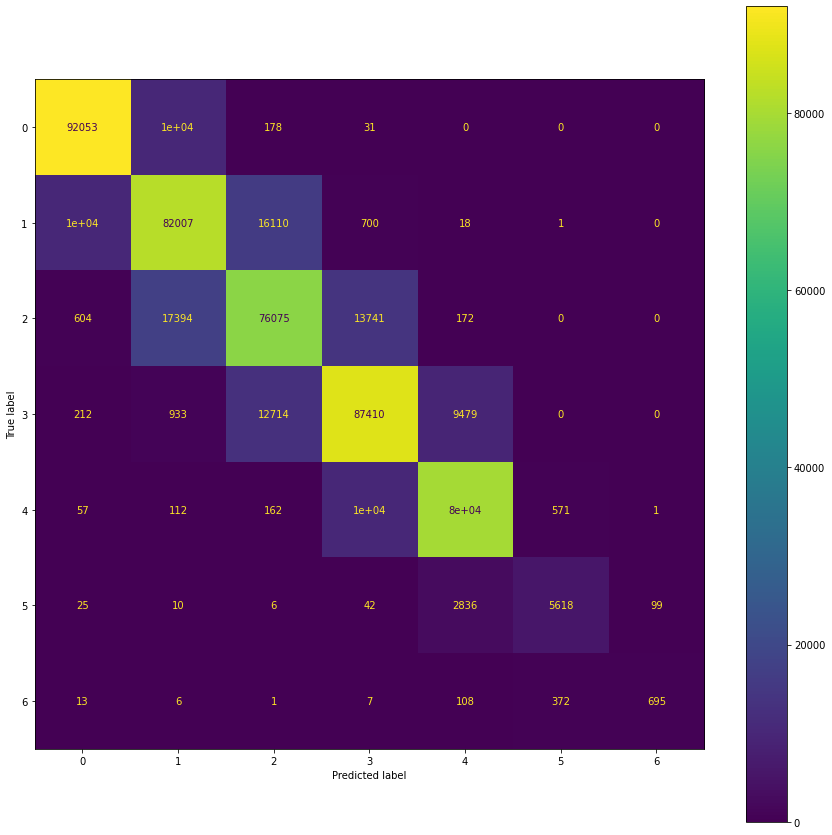

In [57]:
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gscv.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.show()

From the confusion matrix, we can see class 5 and 6 (higher priced cars) had the least true positives. This makes sense given we had less cars the higher the class. 
Class 0 (cheapest cars) had the highest overall F1 score. This makes sense since we had the most cheap cars.
We can also see that there were the most misclassification errors between classes and their neighbors. For example, class 2 was mainly misclassified as either class 1 or class 3.

# Discussion

### Interpreting the result

After attempting to fit SVM, Logistic Regression, and Random Forest, we found that Random Forest gave us the highest accuracy and worked best with our computational limits. To optimize our parameters for Random Forest, we used a pipeline gridsearch. After refitting, our Random Forest model predits used car price with 80% accuracy. 

The accuracy of the logistic regression and SVM models was low due to the complex decision boundaries in our data. These models tend to perform better on a binary classification task, and our problem had 8 possible classes.

Random Forest does not have this problem, as decision tries can more accurately draw boundaries between data that is not linearly separable. Our results support this, as our model with fully-tuned hyperparamaters as per gridsearch cross validation was at least 10 points more accurate than SVM or logistic regression. 

In the grid search section, we examine the choice of max_depth and min_samples_split. For a random forest, max_depth limits the depth for each tree. A deeper tree is more powerful at fitting. The parameter min_samples_split stops creating new nodes after the number of samples waiting for split reaches the limit. A larger min_samples_split will reduce the tree depth and prevent overfitting.

We use 3-fold cross-validation to find better parameters. Accuracy is our metric to evaluate different sets of parameters, because we emphasize what proportion can the model predict correctly.

Based on the cv result, when max_depth is 500, its accuracy is slightly better than the max_depth of 50. The result is reasonable since a single tree is trained with incomplete data, so they are relatively weak on the whole training dataset. Even if a single tree is too deep to overfit, it is overfitting its own samples. Stronger trees will not boost generalization error, but makes the model perform better.  
min_samples_split is more influential, but the difference is also small. Similar to tree depth, when a single tree is stronger, the overall prediction will be more accurate.  

The idea here is to increase the fitting ability for each tree in the model. Therefore, we choose 500 max_depth and 2 min_samples_split. 


### Limitations

Of the 66 variables included in our dataset, we trained our models on only 11. If we had included more our findings would hold more statistical power, however running gridsearch on the hyperparameters we chose to keep already takes nearly two hours. The increased computational cost of including those cut variables would have been significant. Another computing conern is we had to cut some Grid Search parameters because we ran out of RAM. In the future, we'd need to use a computer with better computing power. Furthermore, we had a couple wealthy car outliers that we cut out. There might have been a better way to deal with them. Another concern is model_options had so many unqiue features that one could ask if this lead to overfitting.

Decision trees also have an inability to work well with numeric values, hence the need for ranges, but this leads to inaccuracies. 


### Ethics & Privacy

The data we will be using is entirely anonymous. A previously considered dataset included the VIN (Vehicle Identification Number) and location of sale, which could have potentially been used to identify current or past owners of the cars listed. We decided to use this new dataset as it contains more useful variables, and does not include potentially compromising information. We also remvoved location of the car for privacy concerns, however, it is possible the location would have an impact on car price. Cars from more wealthy neighborhoods are likely to be more expensive. 


### Conclusion

After refitting using Grid Search, our Random Forest model predits used car price with almost 80% accuracy. Compared to other attempts to model used car prices, whose accuracy ranged from 60-90%, <a name="pudaruth"></a>[<sup>[3]</sup>](#pudaruthnote) <a name="enis"></a>[<sup>[4]</sup>](#enisnote), our accuracy is not too far off. In the future, we would like to deal with outliers better, use a system with better computing power, and more complex models such as neural networks. 

# Footnotes
<a name="btsnote"></a>1.[^](#bts): [Number of U.S. Aircraft, Vehicles, Vessels, and Other Conveyances](https://www.bts.gov/content/number-us-aircraft-vehicles-vessels-and-other-conveyances)<br> 
<a name="usedbtsnote"></a>2.[^](#usedbts): [New and Used Passenger Car and Light Truck Sales and Leases](https://www.bts.gov/content/new-and-used-passenger-car-sales-and-leases-thousands-vehicles)<br>
<a name="pudaruthnote"></a>3.[^](#pudaruth): Pudaruth, Sameerchand. "Predicting the price of used cars using machine learning techniques." Int. J. Inf. Comput. Technol 4.7 (2014): 753-764. http://ripublication.com/irph/ijict_spl/ijictv4n7spl_17.pdf <br>
<a name="enisnote"></a>4.[^](#enis): Gegic, Enis, et al. "Car price prediction using machine learning techniques." TEM Journal 8.1 (2019): 113. https://www.temjournal.com/content/81/TEMJournalFebruary2019_113_118.pdf <br>
<a name="knote"></a>5.[^](#k): [K-Fold Cross Validation](https://medium.datadriveninvestor.com/k-fold-cross-validation-6b8518070833)<br>